In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import scipy
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

%run ../Scripts/trajectory.py
%run ../Scripts/trajectoryVisual.py
%run ../Scripts/trajsTree.py
%run ../Scripts/supMethods.py

In [66]:
i = 4
foldername = f"../Data/test{i}"
with open(foldername + "/params.json") as json_file:
    params = json.load(json_file)
with open(foldername + "/sim_params.json") as json_file:
    sim_params = json.load(json_file)

init_list = []
tree_index = 0
tree_path = foldername + f"/trajs_trees/tree{tree_index}.json"
while(os.path.isfile(tree_path)):
    print("tree loaded:", tree_index)
    init_list.append(TreeNode.load_tree(tree_path))
    tree_index += 1
    tree_path = foldername + f"/trajs_trees/tree{tree_index}.json"

tree loaded: 0
tree loaded: 1
tree loaded: 2
tree loaded: 3
tree loaded: 4
tree loaded: 5
tree loaded: 6
tree loaded: 7
tree loaded: 8
tree loaded: 9
tree loaded: 10
tree loaded: 11
tree loaded: 12
tree loaded: 13


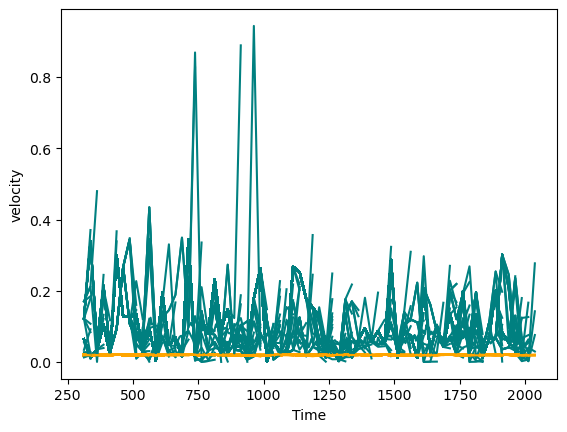

In [90]:
velocity_obs = np.array([])
all_counts = []
velocity_calc = np.array([])
dt = 1

for root_node in init_list:
    for trajs in root_node.get_all_traversals():
        positions = [x.mean for x in trajs]
        time = [x.frame for x in trajs]
        time_avg = average_of_pairs(time)
        
        counts = np.array([x.count for x in trajs])
        counts_avg = average_of_pairs(counts)
        all_counts.extend(counts)

        x_val, y_val = extract_xy(positions)
        if isinstance(x_val, np.ndarray):
            dt = np.diff(time)
            v_obs = np.sqrt(np.diff(x_val)**2 + np.diff(y_val)**2)/dt
            velocity_obs = np.concatenate([velocity_obs, v_obs], axis = 0)

            v_calc = calculate_velocity(counts_avg, params, sim_params)
            velocity_calc = np.concatenate([velocity_calc, v_calc], axis = 0)
            plt.plot(time_avg, v_obs, color = 'teal')
            plt.plot(time_avg, v_calc, color = 'orange')

# plt.ylim(0, 0.2)
plt.xlabel("Time")
plt.ylabel("velocity")
plt.savefig(foldername + "/velocity.png")

In [26]:
velocity_mean = []
velocity_var = []
population_mean = []
population_var = []
velocity_calculated = []

In [44]:
velocity_mean.append(np.mean(velocity))
velocity_var.append(np.var(velocity))
population_mean.append(np.mean(all_counts))
population_var.append(np.var(all_counts))
velocity_calculated.append(np.mean(velocity_calc))

Text(0, 0.5, 'Velocity')

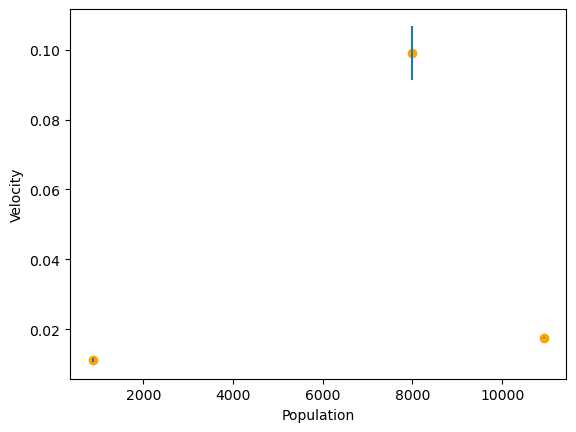

In [65]:
plt.figure()
plt.errorbar(population_mean, velocity_mean, 
             yerr = velocity_var, linestyle = "None")
# plt.scatter(population_mean, velocity_mean)
plt.scatter(population_mean, velocity_calculated, color = "orange")
plt.xlabel("Population")
plt.ylabel("Velocity")
            #  yerr = velocity_var, xerr = population_var)